In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import WOEEncoder
import category_encoders as ce

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')


/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!pip cache purge

Files removed: 4


1. EDA

In [3]:
file_path = '/Users/varalam/Documents/diabetes_prediction_dataset.csv'
df = pd.read_csv(file_path)
df.head(5)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
is_diabetic = df["diabetes"].value_counts()
print("Yes: ",is_diabetic[1])
print("No: ",is_diabetic[0])

The data set is unbalanced

In [ ]:
# Check for duplicates and missing values
print("Missing Values")
print(df.isna().sum())
print("Duplicates:" ,df.duplicated().sum())

In [ ]:
round(df.describe(include="all"), 3)

2. Data Visualization

In [ ]:
is_diabetic = df["diabetes"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_diabetic, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_diabetic Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Gender Distribution

In [ ]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1, 0.1]
df.groupby('gender')['diabetes'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="diabetes", data=df,ax=axb[1], palette="viridis")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Diabetic Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

Age Distribution

In [ ]:
#Age Distribution
plt.hist(df[df['diabetes'] == 1]['age'], bins=20, alpha=1, label='Diabetic', color='red')
plt.hist(df[df['diabetes'] == 0]['age'], bins=20, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Age with Diabetic Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Hypertension Distribution

In [ ]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Hypertension Distribution
explode = [0.1, 0.1]
df.groupby('hypertension')['diabetes'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="hypertension", hue="diabetes", data=df,ax=axb[1], palette="viridis")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Hypertension with Diabetic Status")
plt.xlabel("Hypertension")
plt.ylabel("Count")

# Show the plot
plt.show()

Heart Disease Distribution

In [ ]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Heart Diseas Distribution
explode = [0.1, 0.1]
df.groupby('heart_disease')['diabetes'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="heart_disease", hue="diabetes", palette="viridis", data=df,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Heart Disease with Diabetic Status")
plt.xlabel("Heart Disease")
plt.ylabel("Count")

# Show the plot
plt.show()

Smoking History Distribution

In [ ]:
#Smoking History Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x="smoking_history", data=df, hue="diabetes", palette="viridis")

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Smoking History Category with Diabetic Status")
plt.xlabel("Smoking History")
plt.ylabel("Count")

# Show the plot
plt.show()

BMI Distribution

In [ ]:
#BMI Distribution
plt.hist(df[df['diabetes'] == 1]['bmi'], bins=20, alpha=1, label='Diabetic', color='red')
plt.hist(df[df['diabetes'] == 0]['bmi'], bins=20, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of BMI with Diabetic Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()

Hemoglobin A1c Distribution

Hemoglobin A1c (HbA1c):

Definition: HbA1c is a measure of the average blood glucose levels over the past two to three months.

How it works: When glucose enters the bloodstream, it binds to hemoglobin in red blood cells. The higher the blood glucose levels, the more glucose binds to hemoglobin. HbA1c reflects the percentage of hemoglobin that has glucose attached to it.

Usage: It is a long-term marker of blood sugar control and is commonly used for monitoring and managing diabetes. It provides an average of blood sugar levels over time, offering a more stable indicator than daily or frequent glucose measurements.


In [ ]:
# HbA1c_level Distribution
plt.hist(df[df['diabetes'] == 1]['HbA1c_level'], bins=10, alpha=1, label='Diabetic', color='red')
plt.hist(df[df['diabetes'] == 0]['HbA1c_level'], bins=10, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Hemglobin A1c level over the past 2 to 3 months with Diabetic Status')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')
plt.legend()

Blood Glucose Level Distribution

Blood Glucose Level:

Definition: Blood glucose level represents the concentration of glucose in the blood at a specific point in time.

How it works: Glucose is the primary source of energy for cells, and blood glucose levels can fluctuate throughout the day based on factors like food intake, physical activity, and insulin production.

Usage: Blood glucose levels are often measured through daily monitoring, especially for people with diabetes. It provides immediate information about how the body is handling glucose at a particular moment.

In [ ]:
# Blood Glucose Level Distribution
plt.hist(df[df['diabetes'] == 1]['blood_glucose_level'], bins=10, alpha=1, label='Diabetic', color='red')
plt.hist(df[df['diabetes'] == 0]['blood_glucose_level'], bins=10, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Blood Glucose Level at a Specific Point of Time with Diabetic Status')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.legend()

Box Plots

In [ ]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Box plot of Age by Diabetes Status
sns.boxplot(x='diabetes', y='age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Diabetes Status')

# Box plot of BMI by Diabetes Status
sns.boxplot(x='diabetes', y='bmi', data=df, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution by Diabetes Status')

# Box plot of HbA1c Level by Diabetes Status
sns.boxplot(x='diabetes', y='HbA1c_level', data=df, ax=axes[1, 0])
axes[1, 0].set_title('HbA1c Level Distribution by Diabetes Status')

# Box plot of Blood Glucose Level by Diabetes Status
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Blood Glucose Level Distribution by Diabetes Status')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Skewness using Kernel Density Plot
# Numerical Variables without binary value
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
sns.histplot(df[features], kde=True)
plt.title('Histogram with Kernel Density Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Correlation Matrix

In [ ]:
# Select numerical columns (excluding 'gender')
numerical_columns = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix for selected columns
corr_matrix = df[numerical_columns].corr()

# Plot the correlation coefficients heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficients Heatmap')
plt.show()


3. Data Pre-processing

3.1 Handling Missing Data

In [ ]:
for column_name in df.columns:
    total_na_rows = df[column_name].isna().sum()
    print(f"Total NaN rows in column {column_name}: {total_na_rows}")

Since there is no missing data, we do not need to handle. 

3.2 Handling Outliers

In [4]:
# Create an empty DataFrame to store outliers
df_outliers_only = pd.DataFrame(columns=df.columns)

# Dictionary to store the percentage of outliers for each column
percent_outliers = {}

# Function to calculate the 3-standard deviation range
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3 * sd
    high = mean + 3 * sd
    
    return (low, high)

# Iterate through numerical columns without binary values
# columns - age, bmi, HbA1c_level, blood_glucose_level
for col_name in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
    lower, upper = three_sd_range(df[col_name])
    outliers_mask = (df[col_name] < lower) | (df[col_name] > upper)

     # Calculate the percentage of outliers
    num_outliers = outliers_mask.sum()
    total_values = len(df[col_name])
    percent_outliers[col_name] = (num_outliers / total_values) * 100
    
    # Print information about outliers in each column
    print(f"{col_name} has outliers: {outliers_mask.any()}")
    
    # Collect outliers into the DataFrame
    df_outliers_only = pd.concat([df_outliers_only, df[outliers_mask]])

# Print percentage of outliers for each column
print("\nPercentage of Outliers for Each Column:")
for col, percentage in percent_outliers.items():
    print(f"{col}: {percentage}%")

# Display the DataFrame with outliers only
print("\nDataFrame with Outliers Only:")
df_outliers_only


age has outliers: False
bmi has outliers: True
HbA1c_level has outliers: True
blood_glucose_level has outliers: True

Percentage of Outliers for Each Column:
age: 0.0%
bmi: 1.294%
HbA1c_level: 1.315%
blood_glucose_level: 1.403%

DataFrame with Outliers Only:


/var/folders/l_/wsr7snt95tg3hb6zq4nsc7vw0000gn/T/ipykernel_14042/3447077458.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_outliers_only = pd.concat([df_outliers_only, df[outliers_mask]])


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
11,Female,54.0,0,0,former,54.70,6.0,100,0
39,Female,34.0,0,0,never,56.43,6.2,200,0
59,Female,67.0,0,0,never,63.48,8.8,155,1
93,Male,38.0,0,0,never,55.61,6.5,130,0
98,Female,30.0,0,0,No Info,50.13,6.0,100,0
...,...,...,...,...,...,...,...,...,...
99763,Female,50.0,0,0,never,35.91,6.0,280,1
99826,Male,63.0,0,1,No Info,27.32,6.6,300,1
99867,Male,64.0,1,0,former,33.12,5.7,300,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1


In [5]:
# Create an empty DataFrame to store records without outliers
df_copy = df.copy()
df_without_outliers = pd.DataFrame(columns=df.columns)

# Exclude outliers from the copied DataFrame
df_without_outliers = df_copy.loc[~df_copy.index.isin(df_outliers_only.index)]

df_without_outliers

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Since the variables, 'bmi','HbA1c_level', 'blood_glucose_level' are strong indicators of diabetes, we will not remove the outliers. Removing the outliers might affect our analysis in predicting the diabetes based on these variables.

3.3 Handling Duplicates

In [ ]:
df_without_outliers.duplicated().sum()

In [ ]:
df_outliers_only.duplicated().sum()

Even though our dataset has duplicates, we do not remove them since each record of the patient's are unique and there is chance that they might contain the same information and results. The duplicates are useful. 

3.4 Data Formatting

3.5 Data Encoding

In [6]:
# Check the data types

print(df_outliers_only.dtypes)
print(df_without_outliers.dtypes)

# Convert 'gender' and 'smoking_history' columns to categorical
df_outliers_only['hypertension'] = df_outliers_only['hypertension'].astype('int')
df_outliers_only['heart_disease'] = df_outliers_only['heart_disease'].astype('int')
df_outliers_only['blood_glucose_level'] = df_outliers_only['blood_glucose_level'].astype('int')
df_outliers_only['diabetes'] = df_outliers_only['diabetes'].astype('int')

print(df_outliers_only.dtypes)

gender                  object
age                    float64
hypertension            object
heart_disease           object
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level     object
diabetes                object
dtype: object
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


<h1>Smoking History and Gender Encoding for df_without_outliers<h1>

WOEEncoder

is a type of categorical encoding technique used in machine learning, particularly in the context of handling categorical variables in predictive modeling tasks, such as binary classification. WOE stands for "Weight of Evidence." It is designed for categorical variables, which can include both ordinal and nominal data. It's a popular encoding technique in credit scoring and fraud detection.

In summary, while label encoding simply assigns numerical labels to categories, WOE encoding calculates numerical values based on the relationship between each category and the target variable, providing more meaningful representations for categorical variables in certain modeling contexts, especially those where the predictive power of categorical variables is crucial.

In [7]:
# Applying WOE encoding for smoking history
woe_encoder_smoking_history = ce.WOEEncoder(cols=['smoking_history'])

# Fit and transform the encoder on the data
encoded_smoking_history_df = pd.DataFrame()
encoded_smoking_history_df['smoking_history_encoded'] = woe_encoder_smoking_history.fit_transform(df_without_outliers['smoking_history'], df_without_outliers['diabetes'])

# Concatenate the encoded data with the original DataFrame
new_df_without_outliers = pd.concat([df_without_outliers, encoded_smoking_history_df], axis=1)

# Display the updated DataFrame
new_df_without_outliers.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,0.131757
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,-0.797024
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.131757
3,Female,36.0,0,0,current,23.45,5.0,155,0,0.165669
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.165669


In [8]:
# #Applying WOE encoding for gender

# Initialize the WOEEncoder
woe_encoder = ce.WOEEncoder(cols=['gender'])

# Fit and transform the encoder on the data
encoded_gender_df = pd.DataFrame()
encoded_gender_df['gender_encoded'] = woe_encoder.fit_transform(df_without_outliers['gender'], df_without_outliers['diabetes'])


new_df_without_outliers = pd.concat([new_df_without_outliers, encoded_gender_df], axis=1)

new_df_without_outliers.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded,gender_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,0.131757,-0.128959
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,-0.797024,-0.128959
2,Male,28.0,0,0,never,27.32,5.7,158,0,0.131757,0.160772
3,Female,36.0,0,0,current,23.45,5.0,155,0,0.165669,-0.128959
4,Male,76.0,1,1,current,20.14,4.8,155,0,0.165669,0.160772


<h1>Smoking History and Gender Encoding for df_outliers_only<h1>

In [9]:

# Applying WOE encoding for smoking history
woe_encoder_smoking_history = ce.WOEEncoder(cols=['smoking_history'])

# Fit and transform the encoder on the data
encoded_smoking_history_df_1 = pd.DataFrame()
encoded_smoking_history_df_1['smoking_history_encoded'] = woe_encoder_smoking_history.fit_transform(df_outliers_only['smoking_history'], df_outliers_only['diabetes'])

# Concatenate the encoded data with the original DataFrame
new_df_outliers_only = pd.concat([df_outliers_only, encoded_smoking_history_df_1], axis=1)

# Display the updated DataFrame
new_df_outliers_only.head()



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded
11,Female,54.0,0,0,former,54.70,6.0,100,0,0.310171
39,Female,34.0,0,0,never,56.43,6.2,200,0,-0.052540
59,Female,67.0,0,0,never,63.48,8.8,155,1,-0.052540
93,Male,38.0,0,0,never,55.61,6.5,130,0,-0.052540
98,Female,30.0,0,0,No Info,50.13,6.0,100,0,-0.273853


In [10]:
# #Applying WOE encoding for gender

# Initialize the WOEEncoder
woe_encoder = ce.WOEEncoder(cols=['gender'])

# Fit and transform the encoder on the data
encoded_gender_df_1 = pd.DataFrame()
encoded_gender_df_1['gender_encoded'] = woe_encoder.fit_transform(df_outliers_only['gender'],df_outliers_only['diabetes'])


new_df_outliers_only = pd.concat([new_df_outliers_only, encoded_gender_df_1], axis=1)

new_df_outliers_only.head()



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded,gender_encoded
11,Female,54.0,0,0,former,54.70,6.0,100,0,0.310171,-0.310005
39,Female,34.0,0,0,never,56.43,6.2,200,0,-0.052540,-0.310005
59,Female,67.0,0,0,never,63.48,8.8,155,1,-0.052540,-0.310005
93,Male,38.0,0,0,never,55.61,6.5,130,0,-0.052540,0.561670
98,Female,30.0,0,0,No Info,50.13,6.0,100,0,-0.273853,-0.310005


Smoking History's "No Info" attribute value handling - Iterative Imputation (use LATER - DONT DELETE)

In [ ]:
# new_values = {"never": "no", "current": "yes",  "former": "yes", "ever": "yes", "not current": "yes", }
# df_copy['smoking_history'] = df_copy['smoking_history'].map(new_values)

# df_copy['smoking_history'] = df_copy['smoking_history'].replace({'no': 0, 'yes': 1})
# df_copy.head()

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# missing_mask = df_copy.isna()

# # Use IterativeImputer to impute missing values
# imputer = IterativeImputer(max_iter=10, random_state=0)
# imputed_values = imputer.fit_transform(df_copy)

# # Convert imputed_values back to DataFrame and assign to the original DataFrame
# df_copy = pd.DataFrame(imputed_values, columns=df_copy.columns)

# threshold = 0.5

# # Thresholding the 'smoking_history' column to binary values
# df_copy['smoking_history'] = np.where(df_copy['smoking_history'] > threshold, 1, 0)

# # Print the DataFrame to verify the changes
# df_copy.head()


In [ ]:
# # Create an empty DataFrame to store outliers
# df_copy_outliers_only = pd.DataFrame(columns=df_copy.columns)

# # Dictionary to store the percentage of outliers for each column
# percent_outliers = {}

# # Function to calculate the 3-standard deviation range
# def three_sd_range(series):
#     mean = series.mean()
#     sd = series.std()
#     low = mean - 3 * sd
#     high = mean + 3 * sd
    
#     return (low, high)

# # Iterate through numerical columns without binary values
# # columns - age, bmi, HbA1c_level, blood_glucose_level
# for col_name in ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']:
#     lower, upper = three_sd_range(df_copy[col_name])
#     outliers_mask = (df_copy[col_name] < lower) | (df_copy[col_name] > upper)

#      # Calculate the percentage of outliers
#     num_outliers = outliers_mask.sum()
#     total_values = len(df_copy[col_name])
#     percent_outliers[col_name] = (num_outliers / total_values) * 100
    
#     # Print information about outliers in each column
#     print(f"{col_name} has outliers: {outliers_mask.any()}")
    
#     # Collect outliers into the DataFrame
#     df_copy_outliers_only = pd.concat([df_copy_outliers_only, df_copy[outliers_mask]])

# # Print percentage of outliers for each column
# print("\nPercentage of Outliers for Each Column:")
# for col, percentage in percent_outliers.items():
#     print(f"{col}: {percentage}%")

# # Display the DataFrame with outliers only
# print("\nDataFrame with Outliers Only:")
# df_copy_outliers_only



In [ ]:
# df_copy_without_outliers = pd.DataFrame(columns=df_copy.columns)

# # Exclude outliers from the copied DataFrame
# df_copy_without_outliers = df_copy.loc[~df_copy.index.isin(df_copy_outliers_only.index)]

# df_copy_without_outliers

3.4 Handle Imbalanced Data Structure 

<h1>Downsampling</h1>

Downsampling involves reducing the number of instances in the majority class to balance it with the number of instances in the minority class.

This helps prevent the machine learning model from being biased towards the majority class and improves its ability to learn patterns from the minority class.

Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

In [ ]:
is_diabetic_1 = new_df_without_outliers["diabetes"].value_counts()
print("Yes: ",is_diabetic_1[1])
print("No: ",is_diabetic_1[0])

is_diabetic_2 = new_df_outliers_only["diabetes"].value_counts()
print("Yes: ",is_diabetic_2[1])
print("No: ",is_diabetic_2[0])



We have accessed that the dataset is unbalanced. The diabetic count, the variable to predict is not represented equally.

In [ ]:
# No_class = df_copy[df_copy["diabetes"]==0]
# Yes_class = df_copy[df_copy["diabetes"]==1]

# No_class = resample(No_class, replace=False, n_samples=len(Yes_class))
# down_samples = pd.concat([Yes_class, No_class], axis=0)

# # Count the occurrences of each class in the original dataset
# original_class_counts = df_copy["diabetes"].value_counts()

# # Count the occurrences of each class in the downsampled dataset
# downsampled_class_counts = down_samples["diabetes"].value_counts()

# # Calculate the percentage of each class
# original_percentages = original_class_counts / len(df_copy) * 100
# downsampled_percentages = downsampled_class_counts / len(down_samples) * 100

# # Plotting
# plt.figure(figsize=(12, 6))

# # Bar chart for original class distribution
# plt.subplot(1, 2, 1)
# bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
# for bar, label in zip(bars_1, original_percentages):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
# plt.title('Original Diabetes Class Distribution')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.xticks(original_class_counts.index, ['0', '1'])

# # Bar chart for downsampled class distribution
# plt.subplot(1, 2, 2)
# bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['orange', 'green'])
# for bar, label in zip(bars_2, downsampled_percentages):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
# plt.title('Downsampled Diabetes Class Distribution')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.xticks(downsampled_class_counts.index, ['0', '1'])

# plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
# plt.show()

In [ ]:
# down_samples

<h1>Oversampling</h1>

Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

In [ ]:
# Check the size of the classes before resampling
# print("No_class size:", len(No_class))
# print("Yes_class size:", len(Yes_class))

In [ ]:
# No_class = df_copy[df_copy["diabetes"]==0]
# Yes_class = df_copy[df_copy["diabetes"]==1]

# Yes_class = resample(Yes_class, replace=True, n_samples=len(No_class))
# over_samples = pd.concat([Yes_class, No_class], axis=0)

# # Count the occurrences of each class in the original dataset
# original_class_counts = df_copy["diabetes"].value_counts()

# # Count the occurrences of each class in the oversampled dataset
# oversampled_class_counts = over_samples["diabetes"].value_counts()

# # Calculate the percentage of each class
# original_percentages = original_class_counts / len(df_copy) * 100
# oversampled_percentages = oversampled_class_counts / len(over_samples) * 100

# # Plotting
# plt.figure(figsize=(12, 6))

# # Bar chart for original class distribution
# plt.subplot(1, 2, 1)
# bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['pink', 'blue'])
# for bar, label in zip(bars_1, original_percentages):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
# plt.title('Original Diabetes Class Distribution')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.xticks(original_class_counts.index, ['1', '0'])

# # Bar chart for oversampled class distribution
# plt.subplot(1, 2, 2)
# bars_2 = plt.bar(oversampled_class_counts.index, oversampled_class_counts.values, color=['pink', 'blue'])
# for bar, label in zip(bars_2, oversampled_percentages):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
# plt.title('Oversampled Diabetes Class Distribution')
# plt.xlabel('Class')
# plt.ylabel('Count')
# plt.xticks(oversampled_class_counts.index, ['0','1'])

# plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
# plt.show()

In [ ]:
# over_samples


<h1>SMOTE algorithm</h1> 

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
# !pip install -U imbalanced-learn
# !pip install -U scikit-learn


In [11]:
# Create copies of new_df_without_outliers and new_df_outliers_only
new_df_without_outliers_copy = new_df_without_outliers.copy()
new_df_outliers_only_copy = new_df_outliers_only.copy()

In [12]:
# Drop Gender and Smoking_history columns
columns_to_drop = ["gender", "smoking_history"]
new_df_without_outliers_copy = new_df_without_outliers_copy.drop(columns=columns_to_drop)
new_df_outliers_only_copy = new_df_outliers_only_copy.drop(columns=columns_to_drop)

<h1>SMOTE for New_Df_Without_Outliers_Copy</h1> 

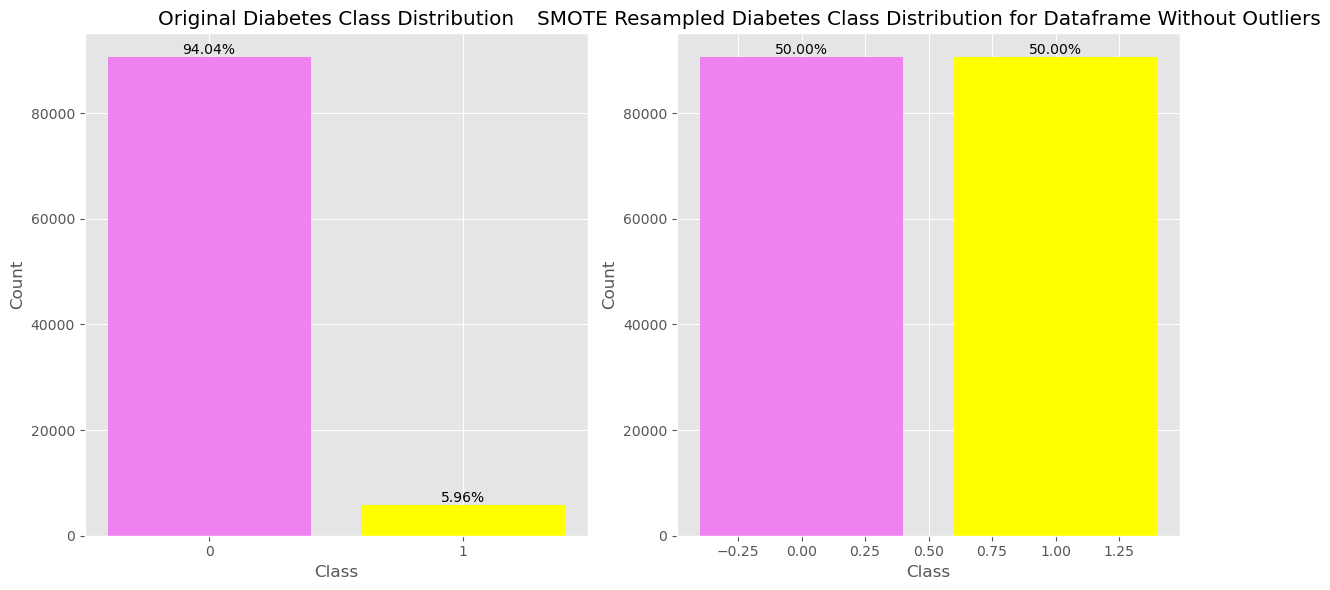

In [13]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = new_df_without_outliers_copy.drop("diabetes", axis=1)
y = new_df_without_outliers_copy["diabetes"]

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the occurrences of each class in the original dataset
original_class_counts = new_df_without_outliers_copy["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(new_df_without_outliers_copy) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y_resampled).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y_resampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe Without Outliers')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [14]:
# Create a DataFrame from the SMOTE resampled data
new_df_without_outliers_copy_smote_resampled = pd.DataFrame(data=X_resampled, columns=X.columns)
new_df_without_outliers_copy_smote_resampled["diabetes"] = y_resampled

new_df_without_outliers_copy_smote_resampled


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,80.0,0,1,25.190000,6.600000,140,0.131757,-0.128959,0
1,54.0,0,0,27.320000,6.600000,80,-0.797024,-0.128959,0
2,28.0,0,0,27.320000,5.700000,158,0.131757,0.160772,0
3,36.0,0,0,23.450000,5.000000,155,0.165669,-0.128959,0
4,76.0,1,1,20.140000,4.800000,155,0.165669,0.160772,0
...,...,...,...,...,...,...,...,...,...
181139,80.0,0,0,27.191924,6.949298,126,0.554826,0.160772,1
181140,80.0,0,0,27.320000,5.800000,155,0.313504,-0.052799,1
181141,35.0,0,0,27.320357,6.995535,159,0.383605,0.160772,1
181142,58.0,0,0,27.320000,6.017092,155,-0.797024,0.160772,1


<h1>SMOTE for New_Df_Outliers_Only_Copy</h1> 

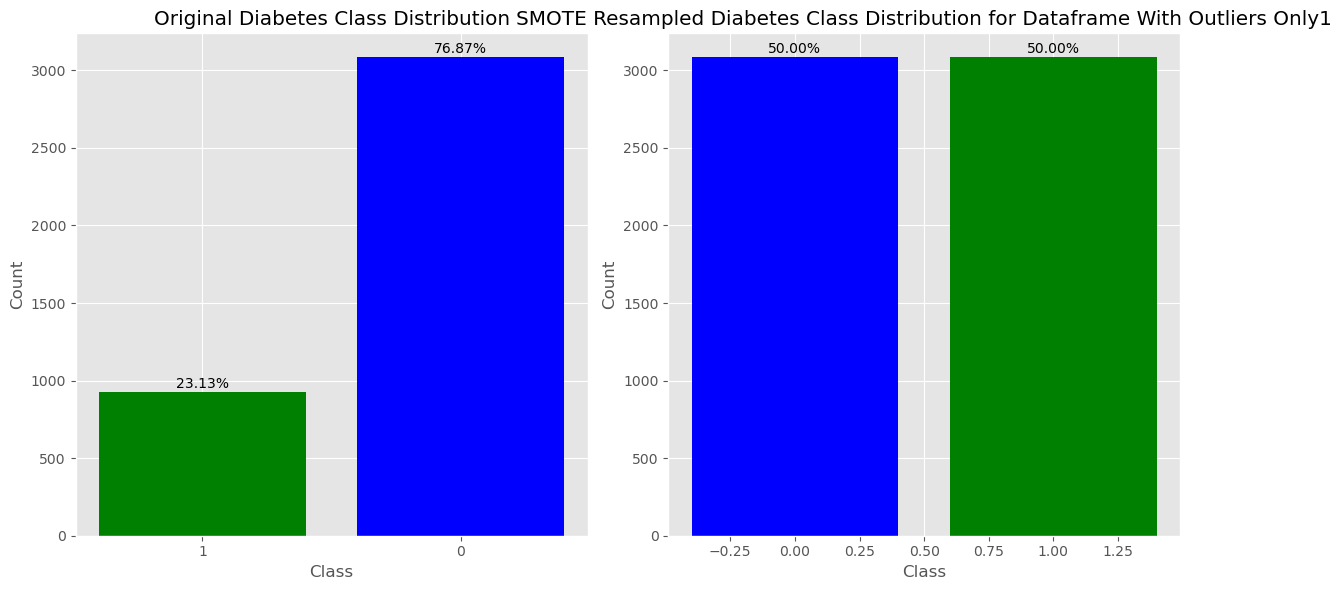

In [33]:
# Separate features (X1) and target variable (y1)
X1 = new_df_outliers_only_copy.drop("diabetes", axis=1)
y1 = new_df_outliers_only_copy["diabetes"]

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply1 SMOTE to the dataset
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)

# Count the occurrences of each class in the original dataset
original_class_counts = new_df_outliers_only_copy["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(new_df_outliers_only_copy) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y1_resampled).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y1_resampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['blue', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['blue', 'green'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe With Outliers Only1')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [34]:
# Create a DataFrame from the SMOTE resampled data
new_df_outliers_only_copy_smote_resampled = pd.DataFrame(data=X1_resampled, columns=X1.columns)
new_df_outliers_only_copy_smote_resampled["diabetes"] = y1_resampled

new_df_outliers_only_copy_smote_resampled



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,54.000000,0,0,54.700000,6.000000,100,0.310171,-0.310005,0
1,34.000000,0,0,56.430000,6.200000,200,-0.052540,-0.310005,0
2,67.000000,0,0,63.480000,8.800000,155,-0.052540,-0.310005,1
3,38.000000,0,0,55.610000,6.500000,130,-0.052540,0.561670,0
4,30.000000,0,0,50.130000,6.000000,100,-0.273853,-0.310005,0
...,...,...,...,...,...,...,...,...,...
6163,58.619390,0,0,48.248887,5.914183,158,-0.052540,-0.310005,0
6164,36.411190,0,0,47.570729,4.800000,127,-0.182851,-0.310005,0
6165,15.709946,0,0,50.525147,6.213743,82,-0.179245,-0.310005,0
6166,40.330285,0,0,51.053191,6.401829,155,-0.200757,-0.022104,0


<h1>EDA using the down_samples</h1>

In [ ]:
# Select numerical columns (excluding 'gender')
numerical_columns = down_samples.select_dtypes(include=['number']).columns

# Compute the correlation matrix for selected columns
corr_matrix = down_samples[numerical_columns].corr()

# Plot the correlation coefficients heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficients Heatmap')
plt.show()

In [ ]:
down_samples.skew()

In [ ]:
df_new = down_samples.select_dtypes(include=[np.number])

gender_dist = df_new["gender"].value_counts()
plt.figure(figsize=(10, 6))
#plt.subplot(1, 2, 1)  # Subplot for the pie chart
explode = [0.1, 0.1]
plt.pie(gender_dist, labels=["Female", "Male"],explode=explode, autopct="%1.1f%%")
plt.title("Gender Distriution of Dataset")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
#fig = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
df_new.groupby('gender')['diabetes'].count().plot.pie(explode=explode, autopct="%1.1f%%");

# Set labels and title
plt.title("Distribution of Gender with Diabetic Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

In [ ]:
#Age Distribution
plt.hist(df_new[df_new['diabetes'] == 1]['age'], bins=20, alpha=1, label='Diabetic', color='red')
#plt.hist(df_new[df_new['diabetes'] == 0]['age'], bins=20, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Age with Diabetic Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
#BMI Distribution
plt.hist(df_new[df_new['diabetes'] == 1]['bmi'], bins=20, alpha=1, label='Diabetic', color='red')
#plt.hist(df_new[df_new['diabetes'] == 0]['bmi'], bins=20, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of BMI with Diabetic Status')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()

In [ ]:
# HbA1c_level Distribution
plt.hist(df_new[df_new['diabetes'] == 1]['HbA1c_level'], bins=10, alpha=1, label='Diabetic', color='red')
#plt.hist(df_new[df_new['diabetes'] == 0]['HbA1c_level'], bins=10, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Hemglobin A1c level over the past 2 to 3 months with Diabetic Status', wrap=True)
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')
plt.legend()

In [ ]:
# Blood Glucose Level Distribution
plt.hist(df_new[df_new['diabetes'] == 1]['blood_glucose_level'], bins=10, alpha=1, label='Diabetic', color='red')
#plt.hist(df_new[df_new['diabetes'] == 0]['blood_glucose_level'], bins=10, alpha=0.5, label='Non-Diabetic', color='blue')

plt.title('Distribution of Blood Glucose Level at a Specific Point of Time with Diabetic Status', wrap=True)
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.legend()

In [ ]:
### Boxplot
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Box plot of Age by Diabetes Status
sns.boxplot(x='diabetes', y='age', data=df_new, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution by Diabetes Status')

# Box plot of BMI by Diabetes Status
sns.boxplot(x='diabetes', y='bmi', data=df_new, ax=axes[0, 1])
axes[0, 1].set_title('BMI Distribution by Diabetes Status')

# Box plot of HbA1c Level by Diabetes Status
sns.boxplot(x='diabetes', y='HbA1c_level', data=df_new, ax=axes[1, 0])
axes[1, 0].set_title('HbA1c Level Distribution by Diabetes Status')

# Box plot of Blood Glucose Level by Diabetes Status
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df_new, ax=axes[1, 1])
axes[1, 1].set_title('Blood Glucose Level Distribution by Diabetes Status')

# Adjust layout
plt.tight_layout()
plt.show()

<h1>Final EDA used in Proposal</h1>

In [ ]:
df_original = pd.read_csv('diabetes_prediction_dataset.csv')

In [ ]:
# histogram
df_original.hist(figsize = (10,10), color = 'red')
plt.tight_layout()

In [ ]:
df_original.skew()

In [ ]:
### Boxplot
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Box plot of Age 
ax1 = sns.boxplot(y='age', data=df_original, ax=axes[0, 0])
ax1.set_title('Age Distribution')

# Box plot of BMI 
ax2 = sns.boxplot(y='bmi', data=df_original, ax=axes[0, 1])
ax2.set_title('BMI Distribution')

# Box plot of HbA1c Level
ax3 = sns.boxplot(y='HbA1c_level', data=df_original, ax=axes[1, 0])
ax3.set_title('HbA1c Level Distribution')

# Box plot of Blood Glucose Level
ax4 = sns.boxplot(y='blood_glucose_level', data=df_original, ax=axes[1, 1])
ax4.set_title('Blood Glucose Level Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df_original.info()

In [ ]:
# Select numerical columns (excluding 'gender')
numerical_columns = df_original.select_dtypes(include=['number']).columns

# Compute the correlation matrix for selected columns
corr_matrix = df_original[numerical_columns].corr()

# Plot the correlation coefficients heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficients Heatmap')
plt.show()

In [ ]:
#Smoking History Bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="smoking_history", data=df_original)

# Add values on top of each bar
#for p in ax.patches:
#    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Smoking History Category with Diabetic Status")
plt.xlabel("Smoking History")
plt.ylabel("Count")
for i in ax.containers:
    ax.bar_label(i,)

# Show the plot
plt.show()

In [ ]:
smoking_status = df_original["smoking_history"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(smoking_status, labels=["never", "No Info", 'current', 'former', 'ever', 'not current'], autopct="%0.0f%%")
plt.title("Smoking History Category Distribution")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
df_original.isnull().any()